In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [187]:
def PrintScatters(dfSeason):   
    city = dfSeason.iloc[0]['City']
    season = dfSeason.iloc[0]['Season']
    
    plotNO2(dfSeason, city, season, linregress = True)
    plt.savefig(f'Images/NO2{city}{season}')
    plt.show()
    
    plotO3(dfSeason, city, season, linregress = True)
    plt.savefig(f'Images/O3{city}{season}')
    plt.show()
    
    plotSO2(dfSeason, city, season, linregress = True)
    plt.savefig(f'Images/SO2{city}{season}')
    plt.show()
    
    plotCO(dfSeason, city, season, linregress = True)
    plt.savefig(f'Images/CO{city}{season}')
    plt.show()

In [173]:
def PlotRegress(x, y):
    slope, intr, r, p, stderr = stats.linregress(x, y)
    reg = (slope * x) + intr
    
    plt.plot(x, reg, color = 'k')
    
    return r

In [188]:
def plotNO2(dfSeason, city, season, marker = '.', color = 'b', linregress = False):
    gSeason = dfSeason.groupby('Year')
    meanNO2 = gSeason['NO2 Mean'].mean()
    years = dfSeason['Year'].unique()
    
    plt.scatter(years, meanNO2, label = season, marker = marker, color = color)
    
    if linregress is True:
        r = PlotRegress(years, meanNO2)
        print(f'r value for NO2 {city} {season}: {r}')
    
    plt.title(f'Mean NO2 in {city} during {season}')
    plt.xlabel('Year')
    plt.ylabel('NO2 (parts per Billion)')

In [189]:
def plotO3(dfSeason, city, season, marker = '.', color = 'b', linregress = False):
    gSeason = dfSeason.groupby('Year')
    meanO3 = gSeason['O3 Mean'].mean()
    years = dfSeason['Year'].unique()
    
    plt.scatter(years, meanO3, label = season, marker = marker, color = color)
    
    if linregress is True:
        r = PlotRegress(years, meanO3)
        print(f'r value for O3 {city} {season}: {r}')
    
    plt.title(f'Mean O3 in {city} during {season}')
    plt.xlabel('Year')
    plt.ylabel('O3 (parts per Million)')
    

In [190]:
def plotSO2(dfSeason, city, season, marker = '.', color = 'b', linregress = False):
    gSeason = dfSeason.groupby('Year')
    meanSO2 = gSeason['SO2 Mean'].mean()
    years = dfSeason['Year'].unique()
    
    plt.scatter(years, meanSO2, label = season, marker = marker, color = color)
    
    if linregress is True:
        r = PlotRegress(years, meanSO2)
        print(f'r value for SO2 {city} {season}: {r}')
    
    plt.title(f'Mean SO2 in {city} during {season}')
    plt.xlabel('Year')
    plt.ylabel('SO2 (parts per Billion)')

In [191]:
def plotCO(dfSeason, city, season, marker = '.', color = 'b', linregress = False):
    gSeason = dfSeason.groupby('Year')
    meanCO = gSeason['CO Mean'].mean()
    years = dfSeason['Year'].unique()
    
    plt.scatter(years, meanCO, label = season, marker = marker, color = color)
    
    if linregress is True:
        r = PlotRegress(years, meanCO)
        print(f'r value for CO {city} {season}: {r}')
    
    plt.title(f'Mean CO in {city} during {season}')
    plt.xlabel('Year')
    plt.ylabel('CO (parts per Million)')


In [178]:
def PrintMergedO3(lSeasons):
    i = 0
    markers = ['.', 's', '*', '^']
    colors = ['c', 'r', 'y', 'b']
    city = lSeasons[0].iloc[0]['City']
    for season in lSeasons:
        seasonName = season.iloc[0]['Season']
        plotO3(season, city, seasonName, markers[i], colors[i])
        i = i + 1
    plt.title(f'Mean 03 by season in {city}')
    plt.legend()
    plt.savefig(f'Images/O3{city}')
    plt.show()
    

In [179]:
def PrintMergedCO(lSeasons):
    i = 0
    markers = ['.', 's', '*', '^']
    colors = ['c', 'r', 'y', 'b']
    city = lSeasons[0].iloc[0]['City']
    for season in lSeasons:
        seasonName = season.iloc[0]['Season']
        plotCO(season, city, seasonName, markers[i], colors[i])
        i = i + 1
    plt.title(f'Mean CO by season in {city}')
    plt.legend()
    plt.savefig(f'Images/CO{city}')
    plt.show()

In [180]:
def PrintMergedSO2(lSeasons):
    i = 0
    markers = ['.', 's', '*', '^']
    colors = ['c', 'r', 'y', 'b']
    city = lSeasons[0].iloc[0]['City']
    for season in lSeasons:
        seasonName = season.iloc[0]['Season']
        plotSO2(season, city, seasonName, markers[i], colors[i])
        i = i + 1
    plt.title(f'Mean SO2 by season in {city}')
    plt.legend()
    plt.savefig(f'Images/SO2{city}')
    plt.show()

In [181]:
def PrintMergedNO2(lSeasons):
    i = 0
    markers = ['.', 's', '*', '^']
    colors = ['c', 'r', 'y', 'b']
    city = lSeasons[0].iloc[0]['City']
    for season in lSeasons:
        seasonName = season.iloc[0]['Season']
        plotNO2(season, city, seasonName, markers[i], colors[i])
        i = i + 1
    plt.title(f'Mean NO2 by season in {city}')
    plt.legend()
    plt.savefig(f'Images/NO2{city}')
    plt.show()

In [186]:
def SetupSeasons(dfCity):
    dfSpring = dfCity.loc[(dfCity['Month'] >= 3) & (dfCity['Month'] < 6)]
    dfSpring['Season'] = 'Spring'
    dfSummer = dfCity.loc[(dfCity['Month'] >= 6) & (dfCity['Month'] < 9)]
    dfSummer['Season'] = 'Summer'
    dfFall = dfCity.loc[(dfCity['Month'] >= 9) & (dfCity['Month'] < 12)]
    dfFall['Season'] = 'Fall'
    dfWinter = dfCity.loc[(dfCity['Month'] == 12) | (dfCity['Month'] < 3)]
    dfWinter['Season'] = 'Winter'
    
    return dfSpring, dfSummer, dfFall, dfWinter

In [183]:
def SetupCity(cityName, dfData):
    dfCity = dfData[dfData['City'] == cityName]
    for index, row in dfCity.iterrows():
        date=  row['Date Local']
        split = date.split('-')
        dfCity.at[index, 'Month'] = int(split[1])
        dfCity.at[index, 'Year'] = int(split[0])

    dfCity = dfCity[['City', 'NO2 Mean', 'NO2 AQI', 'O3 Mean', 'O3 AQI', 'SO2 Mean', 'SO2 AQI',
                     'CO Mean', 'CO AQI', 'Month', 'Year']] 
    return dfCity.dropna()

In [184]:
def AnalyzeCity(cityName, dfData):
    
#     try:
    dfCity = SetupCity(cityName, dfData)
    
    dfSpring, dfSummer, dfFall, dfWinter = SetupSeasons(dfCity)
    
    #remove outliers here?

    PrintScatters(dfSpring)
    PrintScatters(dfSummer)
    PrintScatters(dfFall)
    PrintScatters(dfWinter)
    
    #do some stats stuff here?

    seasons = [dfSpring, dfSummer, dfFall, dfWinter]
    
    PrintMergedO3(seasons)
    PrintMergedNO2(seasons)
    PrintMergedSO2(seasons)
    PrintMergedCO(seasons)

#     except:
#         print(f'{cityName} not found')

In [195]:
dfData = pd.read_csv('Resources/pollution_us_2000_2016.csv')

In [197]:
dfData.columns
dfData['City'].unique()

array(['Phoenix', 'Scottsdale', 'Tucson', 'Concord', 'Bethel Island',
       'San Pablo', 'Pittsburg', 'Calexico', 'Bakersfield', 'Burbank',
       'Los Angeles', 'Long Beach', 'Hawthorne', 'Costa Mesa', 'Rubidoux',
       'Not in a city', 'Arden-Arcade', 'Victorville', 'Chula Vista',
       'San Diego', 'San Francisco', 'Capitan', 'Lompoc', 'Goleta',
       'Vandenberg Air Force Base', 'Davenport', 'Vallejo', 'Welby',
       'Washington', 'Winter Park', 'Chicago', 'Cicero',
       'Calumet City (PU RR name Calumet Park (sta.))',
       'Indianapolis (Remainder)', 'Kansas City', 'Ashland',
       'Lexington-Fayette (corporate name for Lexington)', 'Henderson',
       'Louisville', 'Paducah', 'Baton Rouge', 'Detroit', 'Sunset Hills',
       'Ladue', 'Ferguson', 'St. Ann', 'St. Louis', 'Camden', 'New York',
       'Holtsville', 'Winston-Salem', 'Charlotte', 'Park Hill',
       'Ponca City', 'Pittsburgh', 'Beaver Falls', 'Reading', 'Altoona',
       'Bristol', 'Johnstown', 'Scranton', 'La

C:\Users\caroj\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\caroj\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\caroj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


r value for NO2 Los Angeles Spring: -0.8415656682075197


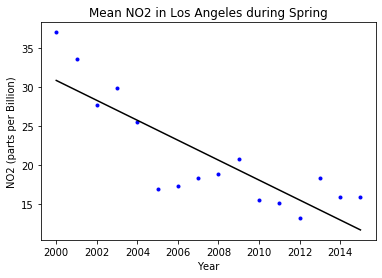

r value for O3 Los Angeles Spring: 0.6130674768872139


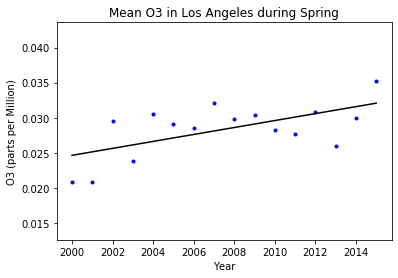

r value for SO2 Los Angeles Spring: -0.651682379500162


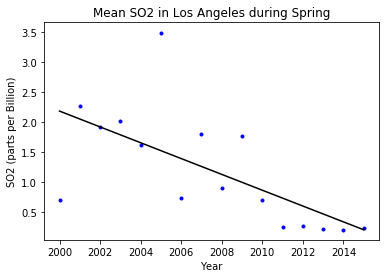

r value for CO Los Angeles Spring: -0.7389083486937323


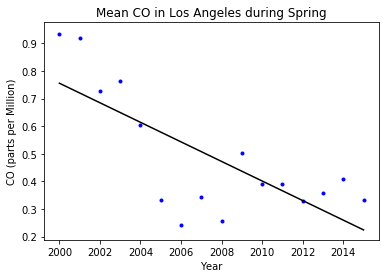

r value for NO2 Los Angeles Summer: -0.8369772851342061


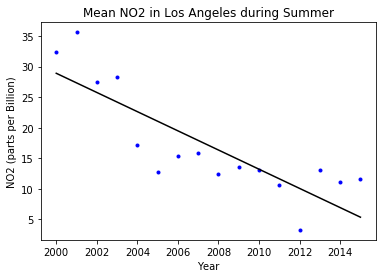

r value for O3 Los Angeles Summer: 0.2590505914161864


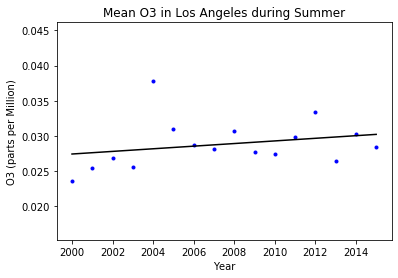

r value for SO2 Los Angeles Summer: -0.7841766421154579


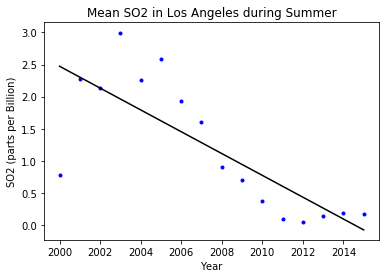

r value for CO Los Angeles Summer: -0.6680298330686308


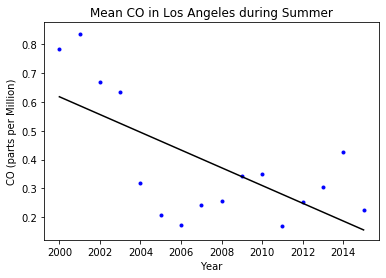

r value for NO2 Los Angeles Fall: -0.8719177141515452


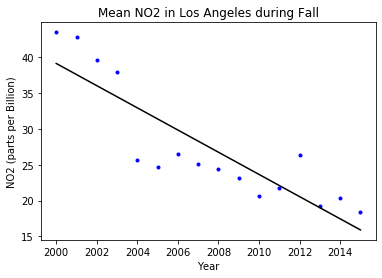

r value for O3 Los Angeles Fall: 0.70970376085122


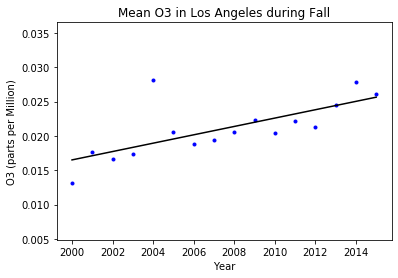

r value for SO2 Los Angeles Fall: -0.7183489980336849


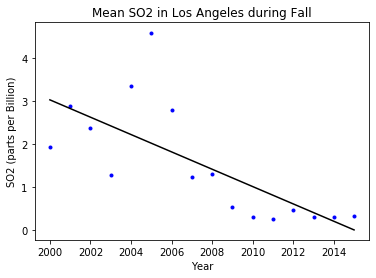

r value for CO Los Angeles Fall: -0.7737135755114847


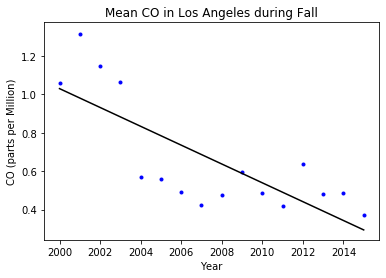

r value for NO2 Los Angeles Winter: -0.7285134590306244


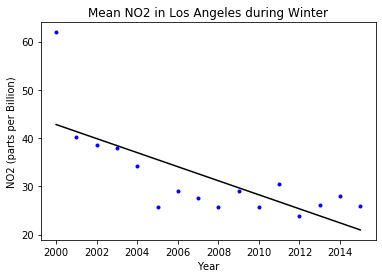

r value for O3 Los Angeles Winter: 0.8717607072690767


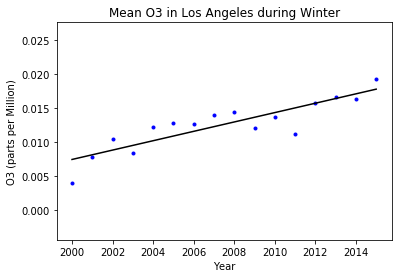

r value for SO2 Los Angeles Winter: -0.8435470745103896


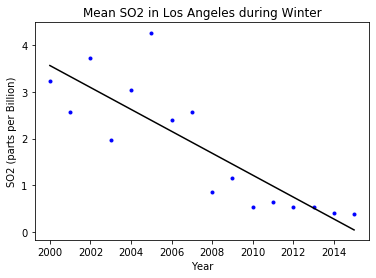

r value for CO Los Angeles Winter: -0.7474359294628096


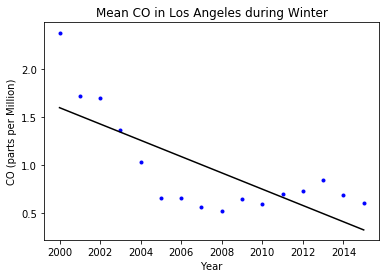

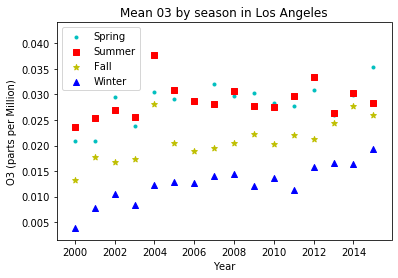

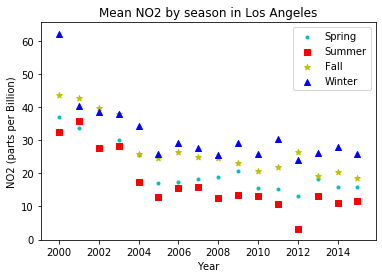

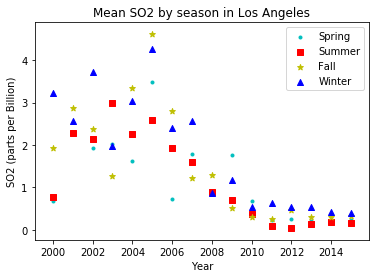

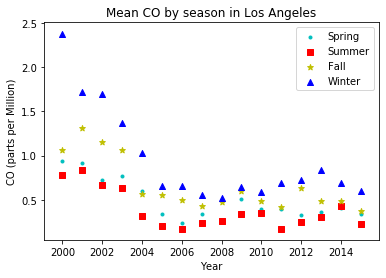

In [193]:
AnalyzeCity('Los Angeles', dfData)

r value for NO2 Reno Spring: 0.3876140016708789


C:\Users\caroj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\caroj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\caroj\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

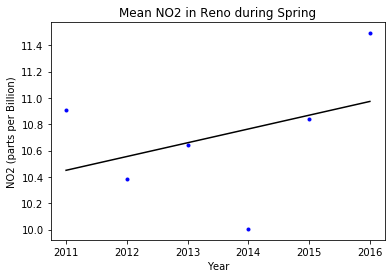

r value for O3 Reno Spring: -0.4155499359223126


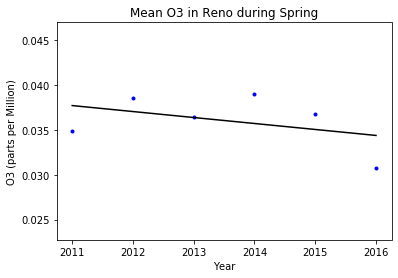

r value for SO2 Reno Spring: -0.8099085765679214


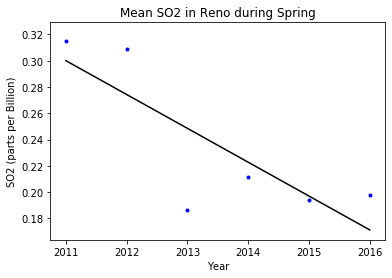

r value for CO Reno Spring: 0.5402132308707241


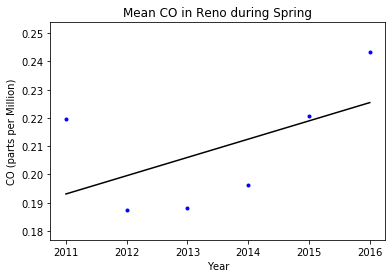

r value for NO2 Reno Summer: -0.5124466630966447


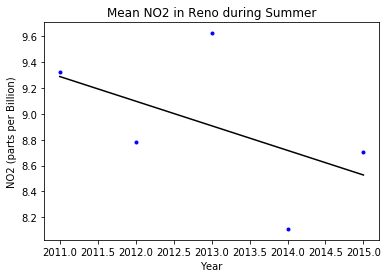

r value for O3 Reno Summer: 0.5003461207752261


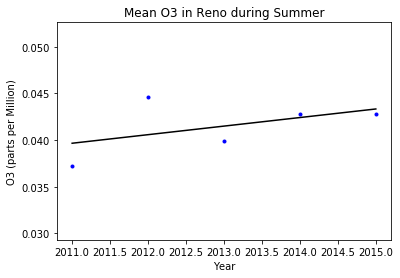

r value for SO2 Reno Summer: -0.29277117465954655


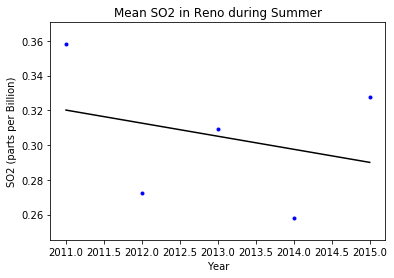

r value for CO Reno Summer: 0.1613259792637567


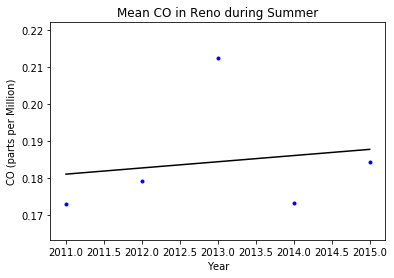

r value for NO2 Reno Fall: -0.9110777562629241


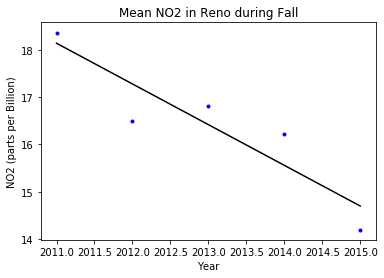

r value for O3 Reno Fall: 0.7234693822141546


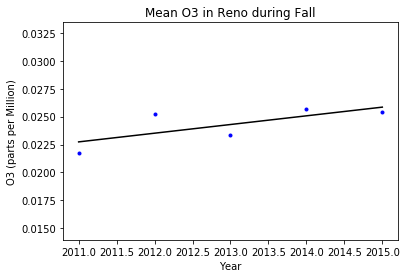

r value for SO2 Reno Fall: -0.4347366859704375


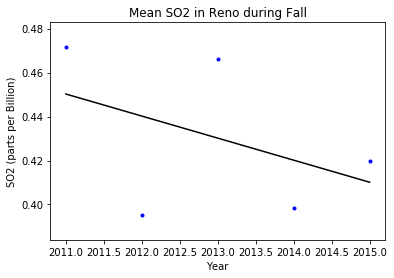

r value for CO Reno Fall: -0.1188216097158723


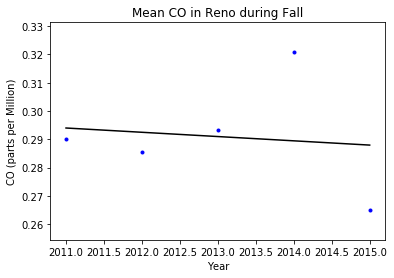

r value for NO2 Reno Winter: -0.45835836145678094


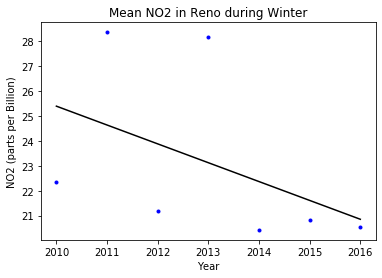

r value for O3 Reno Winter: 0.18852345897613954


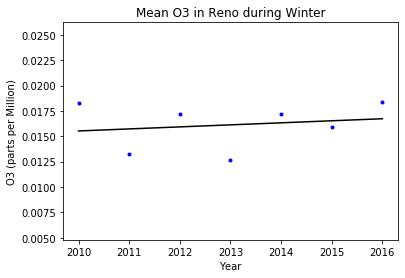

r value for SO2 Reno Winter: -0.045085405793074664


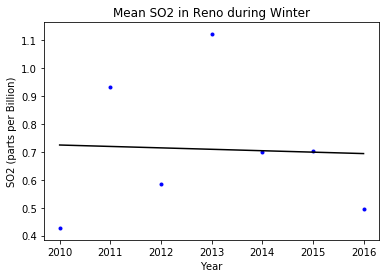

r value for CO Reno Winter: 0.06264277544137162


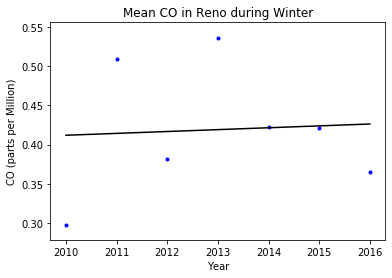

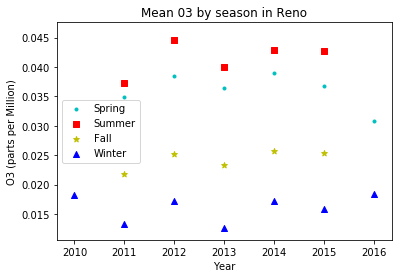

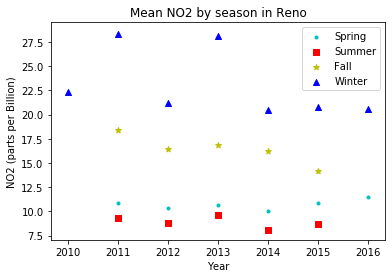

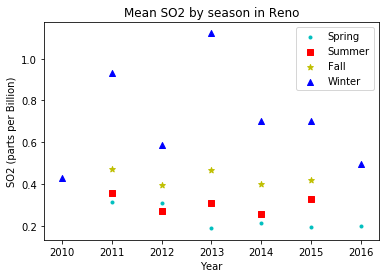

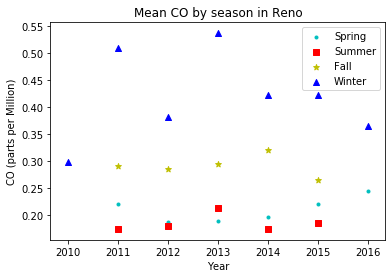

In [198]:
AnalyzeCity('Reno', dfData)